#### 1) Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:
    - изменение слоёв и их количества;
    - изменение метода оптимизации; 
    - изменение процесса обучения; 
    - для продвинутых: преобразование данных.
#### 2) Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cuda:0"
# device = "cpu"

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000,
                                          shuffle=True, num_workers=12)

Files already downloaded and verified


In [5]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=125,
                                         shuffle=False, num_workers=12)

Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [8]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

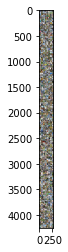

In [9]:
imshow(torchvision.utils.make_grid(images))

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 60, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(60, 120, 3)
        self.fc1 = nn.Linear(120 * 6 * 6, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 128)
        self.fc5 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 120 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [11]:
net = Net()
if device == "cuda:0":
    net.to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [13]:
for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if device == "cpu":
            inputs, labels = data
        elif device == "cuda:0":
            inputs, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 49))
            running_loss = 0.0
print('Finished Training')

[1,    50] loss: 2.104
[2,    50] loss: 1.747
[3,    50] loss: 1.616
[4,    50] loss: 1.539
[5,    50] loss: 1.469
[6,    50] loss: 1.420
[7,    50] loss: 1.365
[8,    50] loss: 1.325
[9,    50] loss: 1.289
[10,    50] loss: 1.254
[11,    50] loss: 1.215
[12,    50] loss: 1.182
[13,    50] loss: 1.163
[14,    50] loss: 1.133
[15,    50] loss: 1.107
[16,    50] loss: 1.080
[17,    50] loss: 1.059
[18,    50] loss: 1.043
[19,    50] loss: 1.016
[20,    50] loss: 0.995
[21,    50] loss: 0.970
[22,    50] loss: 0.949
[23,    50] loss: 0.939
[24,    50] loss: 0.917
[25,    50] loss: 0.892
[26,    50] loss: 0.882
[27,    50] loss: 0.869
[28,    50] loss: 0.850
[29,    50] loss: 0.829
[30,    50] loss: 0.824
[31,    50] loss: 0.796
[32,    50] loss: 0.784
[33,    50] loss: 0.767
[34,    50] loss: 0.753
[35,    50] loss: 0.735
[36,    50] loss: 0.721
[37,    50] loss: 0.701
[38,    50] loss: 0.685
[39,    50] loss: 0.667
[40,    50] loss: 0.656
[41,    50] loss: 0.626
[42,    50] loss: 0.609
[

In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        if device == "cpu":
            images, labels = data
        elif device == "cuda:0":
            images, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        if device == "cpu":
            images, labels = data
        elif device == "cuda:0":
            images, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 77 %
Accuracy of  bird : 46 %
Accuracy of   cat : 67 %
Accuracy of  deer : 57 %
Accuracy of   dog : 60 %
Accuracy of  frog : 78 %
Accuracy of horse : 66 %
Accuracy of  ship : 70 %
Accuracy of truck : 94 %


In [16]:
torch.save(net.state_dict(), "./cifar_net.pth")